## Data Frames: Advanced Topics

We learned how to load data into data frames in our earlier lessons - for example, we can load a dataset from the file `data/ice-cream-sales.csv`:

In [1]:
ice.cream.df <- read.csv("data/ice-cream-sales.csv")
head(ice.cream.df)

DailyHighTemperatureC,DailySalesContainers
<int>,<int>
21,19
22,10
23,24
24,57
26,49
26,77


Let's take a look at a scatter plot of this data:

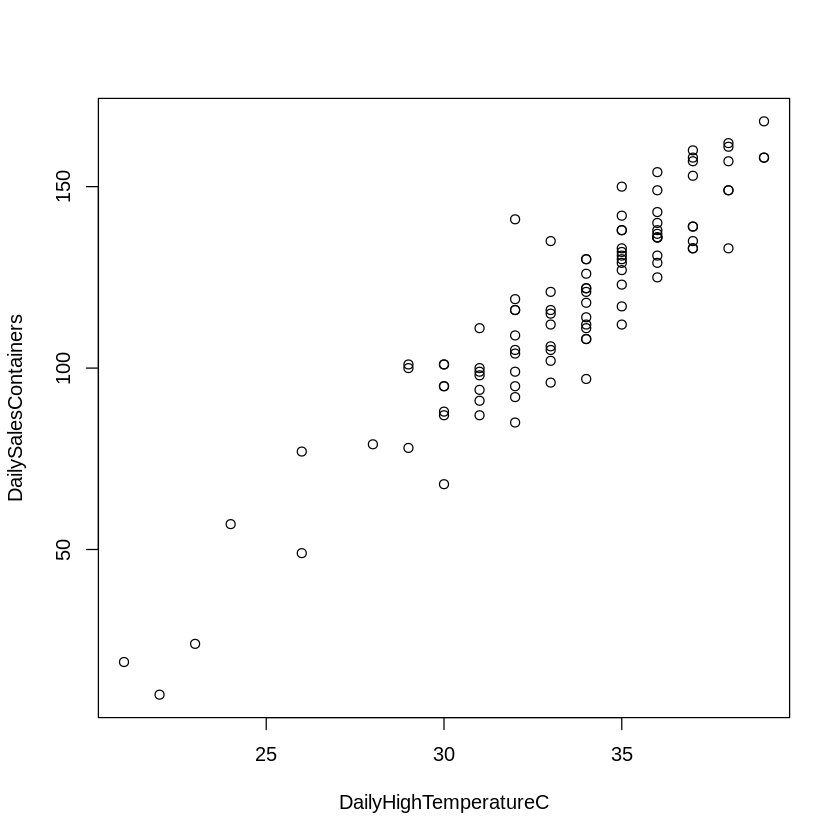

In [2]:
plot(DailySalesContainers ~ DailyHighTemperatureC, data=ice.cream.df)

We're now going to learn how to slice and dice this data frame in interesting and useful ways.

## Locating Values using the `which` Functions

Which row in `ice.cream.df` has the lowest sales? We can find out using the appropriate `which` function:

In [3]:
which.min(ice.cream.df$DailySalesContainers)

[1] 2

If we want to grab the row itself, all we need to do is pass the returned index to the `[...]` operator:

In [4]:
ice.cream.df[which.min(ice.cream.df$DailySalesContainers), ]

,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
2,22,10


Similarly, we can find the row with the highest temperature using the `which.max` function:


In [5]:
ice.cream.df[which.max(ice.cream.df$DailyHighTemperatureC), ]

,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
98,39,158


## Sorting our Dataframe

Before we experiment with sorting, let's scramble our dataframe using the `sample` function so that sorting it will be more interesting. To scramble the rows of our data frame, let's first get a vector of the row numbers in random order:

In [6]:
random.row.order <- sample(nrow(ice.cream.df))
head(random.row.order)

[1] 53 58 12 13 88 19

Now we can scramble our dataframe:

In [7]:
ice.cream.df.scrambled <- ice.cream.df[random.row.order,]

Note that since we assigned the result of our scrambling operation to `ice.cream.df.scrambled`, the original dataframe is undisturbed:

In [8]:
print("original:")
head(ice.cream.df)
print("scrambled:")
head(ice.cream.df.scrambled)

[1] "original:"


DailyHighTemperatureC,DailySalesContainers
<int>,<int>
21,19
22,10
23,24
24,57
26,49
26,77


[1] "scrambled:"


,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
53,34,112
58,35,130
12,30,68
13,30,88
88,37,135
19,31,111


Now that we have `ice.cream.df.scrambled` in hand, let's sort the rows. We can figure out what order our sorted rows should go in using the `order` function:

In [9]:
ordered.row.numbers <- order(ice.cream.df.scrambled$DailyHighTemperatureC)
head(ordered.row.numbers)

[1] 39 87 53 56 24 52

To actually sort the rows, we'll use the `[...]` to select the appropriate rows in the appropriate order: 

In [10]:
ice.cream.df.sorted <- ice.cream.df.scrambled[ordered.row.numbers,]
head(ice.cream.df.sorted)
tail(ice.cream.df.sorted)

,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
1,21,19
2,22,10
3,23,24
4,24,57
6,26,77
5,26,49


,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
96,38,162
95,38,161
92,38,133
98,39,158
100,39,168
99,39,158


## Advanced Filtering of Rows

We have already seen that it is possible to filter rows using `logical` vectors: for example, we can grab all rows with `DailyHighTemperatureC` greater than `30`:

In [11]:
hot.days <- ice.cream.df[ice.cream.df$DailyHighTemperatureC > 30,]
head(hot.days)

,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
18,31,100
19,31,111
20,31,87
21,31,99
22,31,98
23,31,91


If we want the *opposite effect* (to exclude the hot days) we can simply use the logical negation operator `!`:

In [12]:
cold.days <- ice.cream.df[!(ice.cream.df$DailyHighTemperatureC > 30),]
head(cold.days)

DailyHighTemperatureC,DailySalesContainers
<int>,<int>
21,19
22,10
23,24
24,57
26,49
26,77


But what if we just want to exclude a specific set of rows, rather than excluding rows based on a logical condition? To exclude rows based on their *index* (their row number), use the `-` operator instead of the `!` operator:

In [13]:
rows.to.exclude <- c(2,4,5)
head(ice.cream.df[-rows.to.exclude,])

,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
1,21,19
3,23,24
6,26,77
7,28,79
8,29,100
9,29,101


## Adding New Columns to Our Data Frame

If we naively try to add a new column to our data frame without giving the new column the appropriate number of elements, whatever values we pass will simply be repeated the appropriate number of times:

In [14]:
# make a copy so we don't mess up the original
ice.cream.df.copy <- ice.cream.df
ice.cream.df.copy$a.new.col <- "this value is repeated"
head(ice.cream.df.copy)

DailyHighTemperatureC,DailySalesContainers,a.new.col
<int>,<int>,<chr>
21,19,this value is repeated
22,10,this value is repeated
23,24,this value is repeated
24,57,this value is repeated
26,49,this value is repeated
26,77,this value is repeated


We can also use the `cbind` function to accomplish the same effect - though note that it converts its argument to a factor:

In [15]:
same.thing <- cbind(ice.cream.df, "used cbind")
head(same.thing)

DailyHighTemperatureC,DailySalesContainers,"""used cbind"""
<int>,<int>,<fct>
21,19,used cbind
22,10,used cbind
23,24,used cbind
24,57,used cbind
26,49,used cbind
26,77,used cbind


## Adding New Rows to Our Data Frame

Similar to the column case described above, there are two different ways to add new rows to a data frame. The first way is to simply invoke the `[...]` operator with the appropriate arguments:

In [16]:
# make a copy for safety
with.more.rows <- ice.cream.df
print("original last row")
tail(with.more.rows, n=1)
with.more.rows[nrow(with.more.rows)+1,] <- list(31, 155)
print("new last row")
tail(with.more.rows, n=1)

[1] "original last row"


,DailyHighTemperatureC,DailySalesContainers
,<int>,<int>
100,39,168


[1] "new last row"


,DailyHighTemperatureC,DailySalesContainers
,<dbl>,<dbl>
101,31,155


Note that if we attempt to add a row with the wrong data types, R will convert our columns to `character` type, so be careful not to do this

In [17]:
with.more.rows[nrow(with.more.rows)+1,] <- list("very", "wrong")
tail(with.more.rows, n=2)

,DailyHighTemperatureC,DailySalesContainers
,<chr>,<chr>
101,31,155
102,very,wrong


We can also use `rbind` for rows in the same manner that we use `cbind` for columns:

In [18]:
with.more.rows <- rbind(with.more.rows, list("yet another row", 1337))
tail(with.more.rows, n=1)

,DailyHighTemperatureC,DailySalesContainers
,<chr>,<chr>
103,yet another row,1337


<span style="color:blue;font-weight:bold">Exercise</span>: Perform the following actions:

* Copy `ice.cream.df` to a new variable called `exercise.df`
* Use `cbind` to add a new column named `counter` containing the values `1:100` - store the result in a new variable `extended.exercise.df`
* Use `rbind` to add a new row to `extended.exercise.df` containing the values `1337`, `31337`, and `"haxx"` - store the result in the variable `final.exercise.df`

In [23]:
# delete this entire line and replace it with your code

exercise.df <- ice.cream.df
extended.exercise.df <- cbind(exercise.df, "counter" = 1:100)
final.exercise.df <- rbind(extended.exercise.df, c(1337, 31337, "haxx"))

tail(final.exercise.df)

,DailyHighTemperatureC,DailySalesContainers,counter
,<chr>,<chr>,<chr>
96,38,162,96
97,38,157,97
98,39,158,98
99,39,158,99
100,39,168,100
101,1337,31337,haxx


In [24]:
correct.exercise.df <- read.csv("data/ice-cream-sales.csv")
check.variable.value("exercise.df", correct.exercise.df)
check.variable.value("extended.exercise.df$counter", 1:100)
check.variable.definition("final.exercise.df")
assert.true(all(as.character(tail(final.exercise.df, n=1)) == c("1337", "31337", "haxx")), "Did you add the last row to <code>final.exercise.df</code> correctly?")
success()

Correct!